## Gradients using a user defined function

In [1]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import seaborn as sns

Original tensor: tensor([3.], dtype=torch.float16)
Output tensor: tensor([33.], dtype=torch.float16)
Value for backward pass: tensor([5.], dtype=torch.float16)
Gradient: tensor([55.], dtype=torch.float16)


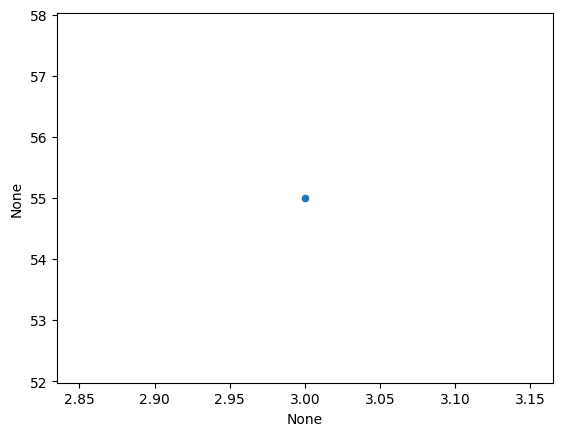

In [2]:
POWER = 2
MULTIPLIER = 5
CONSTANT = 9

# Setup a tensor with gradients enabled.
data_as_list = [3]
x = torch.tensor(data_as_list, dtype=torch.float16, requires_grad=True)

# Raise x to some power using the exponential operator.
a = x**POWER

# Add a multiple of x.
b = a + MULTIPLIER*x

# Add a constant.
out = b + CONSTANT

# What we have is y = f(x) = x**POWER + MULTIPLIER*x + CONSTANT
# dx/dy = POWER*x**(POWER-1) + MULTIPLIER
v = torch.tensor([5], dtype=torch.float16)
out.backward(v, retain_graph=True)

# Output
print('Original tensor:', x.detach())
print('Output tensor:', out.detach())
print('Value for backward pass:', v.detach())
print('Gradient:', x.grad.detach())
sns.scatterplot(x=x.detach(), y=x.grad.detach())

# Clear the gradients for x.
_ = x.grad.zero_()

In [ ]:
print('out:')
print(out.grad_fn)
print(out.grad_fn.next_functions)
print(out.grad_fn.next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)
print('\nx:')
print(x.grad_fn)

In [ ]:
POWER = 2
MULTIPLIER = 5
CONSTANT = 9

# Setup a tensor with gradients enabled.
data_as_list = [3, 6, 9]
x = torch.tensor(data_as_list, dtype=torch.float16, requires_grad=True)

# Raise x to some power using the exponential operator.
a = x**POWER
print('x to the power of 2 plus 10:', a)

# Add a multiple of x.
b = a + MULTIPLIER*x

# Add a constant.
c = b + CONSTANT

# For some reason you have to do this.
out = c.sum()

# What we have is y = f(x) = x**POWER + MULTIPLIER*x + CONSTANT
# dx/dy = POWER*x**(POWER-1) + MULTIPLIER
out.backward()

# Output
print('Original tensor:', x.detach())
print('Output tensor:', out.detach())
print('Gradient:', x.grad.detach())
sns.scatterplot(x=x.detach(), y=x.grad.detach())

# Clear the gradients for x.
_ = x.grad.zero_()

#### Seaborn Test

In [ ]:
plt.plot([3,6,9], [12,23,23])